In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.1


In [4]:
raw_dataset = pd.read_csv(
    "data.csv", header=None,
    names=["Population", "Profit"])
dataset = raw_dataset.copy()
dataset.tail()

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [5]:
dataset.isna().sum()

Population    0
Profit        0
dtype: int64

In [6]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

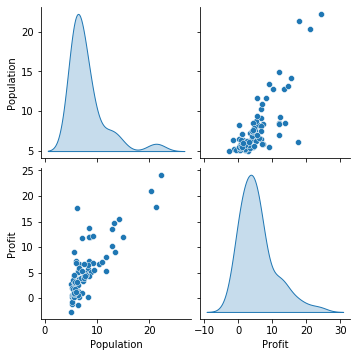

In [7]:
import seaborn as sns
sns.pairplot(train_dataset[['Population', 'Profit']], diag_kind='kde')

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,78.0,7.958629,3.565403,5.0269,5.708450,6.56865,8.49000,22.203
Profit,78.0,5.535739,5.293459,-2.6807,1.840975,4.32210,6.99085,24.147


In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Profit')
test_labels = test_features.pop('Profit')

In [11]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Population,7.958629,3.565403
Profit,5.535739,5.293459


In [16]:
population = np.array(train_features['Population'])
normalizer = layers.LayerNormalization(input_shape=[1,], axis=0)
normalizer.apply(population)

Instructions for updating:
Please use `layer.__call__` method instead.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



2021-10-19 09:56:44.535218: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/foxy/opt/yaml_cpp_vendor/lib:/opt/ros/foxy/opt/rviz_ogre_vendor/lib:/opt/ros/foxy/lib/x86_64-linux-gnu:/opt/ros/foxy/lib
2021-10-19 09:56:44.535269: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-19 09:56:44.535306: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (abel-Vostro-3405): /proc/driver/nvidia/version does not exist
2021-10-19 09:56:44.535780: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-10-19 09:56:44.572808: I tensorflow/core/platform/profile_utils/cpu_utils.cc:

<tf.Tensor: shape=(78,), dtype=float32, numpy=
array([ 1.375, -0.407,  0.158, -0.452, -0.694, -0.782, -0.45 ,  0.654,
       -0.459,  0.095, -0.1  , -0.818, -0.176,  0.127,  0.175, -0.764,
       -0.697, -0.676, -0.583, -0.416, -0.617,  3.76 , -0.27 ,  0.345,
       -0.244,  1.056, -0.136, -0.712, -0.629, -0.398,  0.245, -0.805,
        0.158, -0.589, -0.748,  0.846, -0.432, -0.475,  1.962, -0.207,
       -0.686, -0.785,  1.058, -0.304, -0.592, -0.728, -0.798, -0.72 ,
        1.377,  0.12 , -0.688,  0.422, -0.522,  0.071,  1.473, -0.118,
        1.752, -0.007, -0.461, -0.151, -0.635, -0.387, -0.635, -0.655,
       -0.119,  0.364, -0.452, -0.654, -0.828, -0.251,  4.021, -0.682,
        0.094,  1.534,  3.495, -0.499, -0.091, -0.551], dtype=float32)>

In [22]:
model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=[1,])
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(
    train_features['Population'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,2.269109,2.378229,95
96,2.261907,2.371958,96
97,2.262160,2.362710,97
98,2.261450,2.357481,98
99,2.269233,2.354844,99


In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

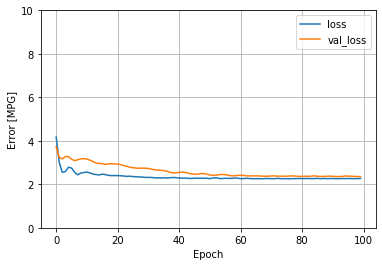

In [28]:
plot_loss(history)

In [29]:
test_results = {}

test_results['model'] = model.evaluate(
    test_features['Population'],
    test_labels, verbose=0)

In [30]:
x = tf.linspace(0.0, 250, 251)
y = model.predict(x)

In [39]:
def plot_profit(x, y):
  figure(figsize=(6, 10), dpi=80)
  plt.scatter(train_features['Population'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Population')
  plt.ylabel('Profit')
  plt.legend()
  plt.xlim(0, 30)
  plt.ylim(0, 30)

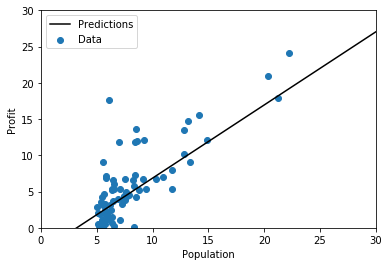

In [40]:
plot_profit(x,y)

In [41]:
print(model.trainable_variables)

[<tf.Variable 'dense_5/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.009]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([-3.236], dtype=float32)>]
